#### Same thing as before, loading dataset...

In [2]:
import pandas as pd
import numpy as np
from utils import MusicDataLoader
from collections import Counter
from sklearn.model_selection import ParameterGrid,cross_validate
from sklearn.utils import resample

loader = MusicDataLoader()
mus_nodes = loader.get_features(n_release_bins=100)
mus_nodes.network_rank = mus_nodes.network_rank.fillna(0)

# add billboard data
billboard = pd.read_csv('data/charts.csv')
billboard.date = pd.to_datetime(billboard.date)
billboard['name'] = billboard.artist.str.split('&',n=1).str[0].str.split('Featuring').str[0].str.strip()
billboard = billboard.merge(mus_nodes,on='name')
after_date = billboard[billboard.date > '2021-7-01']
mus_nodes['is_billboard'] = mus_nodes.id.isin(after_date.id)
# mus_nodes.is_billboard.sum()

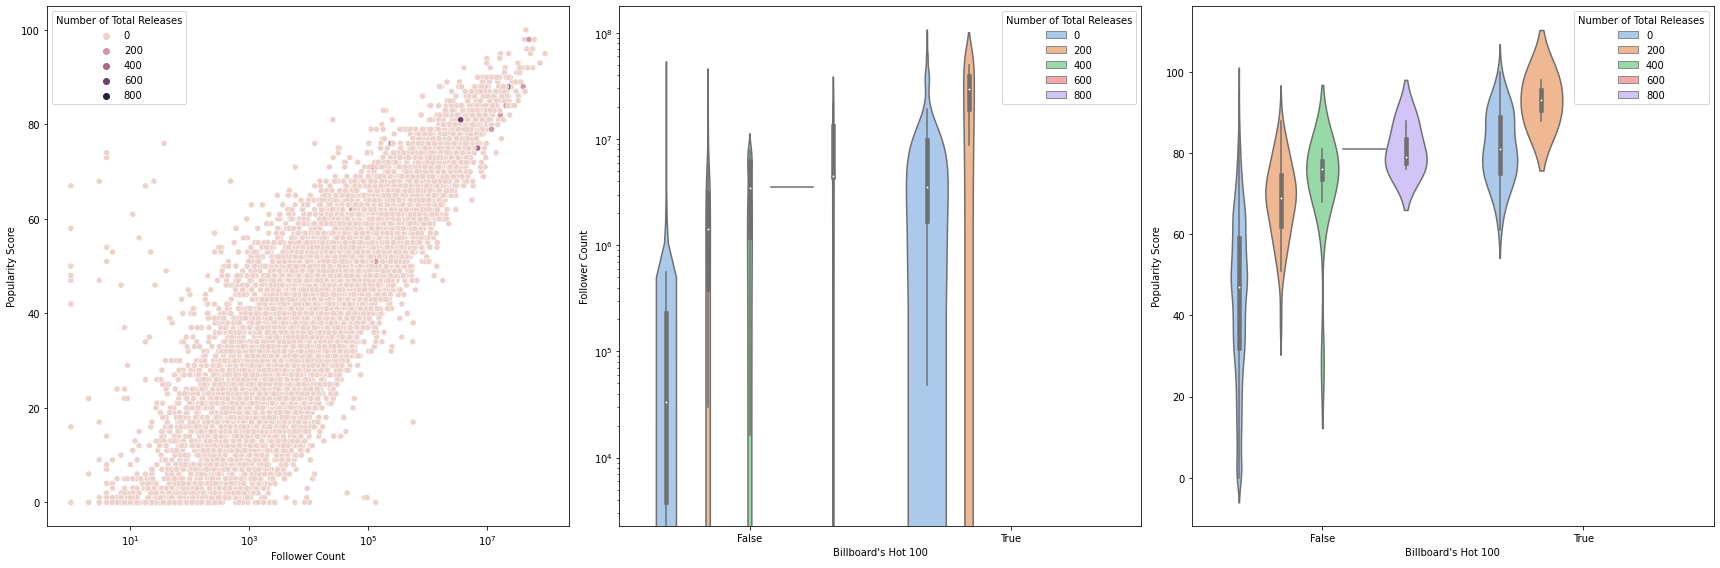

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame()

df[['Follower Count','Popularity Score','Number of Total Releases','Network Rank','Billboard\'s Hot 100']] = mus_nodes[['followers','popularity','num_release','network_rank','is_billboard']].copy()
df['Number of Total Releases'] = df['Number of Total Releases']//200 * 200
# df.network_rank = df.network_rank**4

fig,axes = plt.subplots(figsize=(24,8),ncols=3)

_ = sns.scatterplot(
    data = df,
    x='Follower Count',
    y='Popularity Score',
    hue='Number of Total Releases',
    # size='Network Rank',
    ax= axes[0],
    # palette='pastel'
).set(
    xscale='log'
)

# df['Number of Total Releases'] = df['Number of Total Releases']//300

_ = sns.violinplot(
    data = df,
    x='Billboard\'s Hot 100',
    y='Follower Count',
    hue='Number of Total Releases',
    # size='Network Rank',
    ax= axes[1],
    palette='pastel'
).set(
    xticks=[0,1],
    xticklabels=['False','True'],
    yscale='log'
    # xscale='log'
)

_ = sns.violinplot(
    data = df,
    x='Billboard\'s Hot 100',
    y='Popularity Score',
    hue='Number of Total Releases',
    # size='Network Rank',
    ax= axes[2],
    palette='pastel'
).set(
    xticks=[0,1],
    xticklabels=['False','True']
    # xscale='log'
)

plt.tight_layout()
fig.savefig('pics/3_success_metrics.png',dpi=300)